<img src="https://2.bp.blogspot.com/-nwuCSqykPh4/XJ40CXkkC_I/AAAAAAAAAB4/S3U2Mugv5x8cciG7QzAPD_YMyVWMMmZlgCK4BGAYYCw/s1600/logo-mediano_0.png" width="200" heigth="400" align= "right"/>

## Universidad Galileo	
### IIO. Instituto en Investigación de Operaciones
### Maestría: Data Scientist
### Curso: Ciencia de Datos en Python, Seccion U
### Catedrático: Ing. Preng Biba

### Proyecto 1

### Librerías a utilizar:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
from sklearn.linear_model import LinearRegression
style.use('ggplot')

### Como parte de la ejecución del proyecto se procede a la carga de los datos

In [3]:
# Esto me permite cargar datos en formato binario
datos = np.load('proyecto_training_data.npy')
print(datos.shape)

(1460, 6)


### 2. Usando sclicing con NumPy separar los datos en 2 datasets: entrenamiento(80 %) y validaci´ony pruebas(20 %).

In [4]:
# Con esto obtenemos el número de filas
num_filas = datos.shape[0]

#calculamos el 80% de las filas totales
train_size = int(num_filas * 0.8)

#Hacemos la elección de las primneras filas, usando slicing.
#Estas filas se asignan al conjunto de entrenamiento
train_data = datos[:train_size]
test_data = datos[train_size:]

print(train_data.shape)
print(test_data.shape)

(1168, 6)
(292, 6)


### Datos segun las indicaciones del data fields

In [5]:
columnas = ['SalePrice', 'OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage']

# SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

# OverallQual: Overall material and finish quality, rates the overall material and finish of the house

# 1stFlrSF: First Floor square feet

# TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

# YearBuilt: Original construction date

# LotFrontage: Linear feet of street connected to property

data = pd.DataFrame(datos, columns=columnas)
train = pd.DataFrame(train_data, columns=columnas)
train_data_df = pd.DataFrame(train_data, columns=columnas)
test = pd.DataFrame(test_data, columns=columnas)

### Detalles

In [6]:
data.describe()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


### 3. Análisis exploratorio de datos: Para cada variable en el dataset calcular((usando numpy o pandas):
### 1 media.
### 2 valor m´aximo.
### 3 valor m´ınimo.
### 4 rango(peak to peak, no el rango del tensor que por ser vector sabemos que es 1). 
### 5 desviacióon estándar.

In [7]:
medias = train_data_df.mean()
maximos = train_data_df.max()
minimos = train_data_df.min()
rango_p2p = maximos - minimos
desviacion_estandar = train_data_df.std()

print("Medias:\n", medias)
print("\nMáximos:\n", maximos)
print("\nMínimos:\n", minimos)
print("\nRango P2P:\n", rango_p2p)
print("\nDesviación estándar:\n", desviacion_estandar)

Medias:
 SalePrice       180590.277397
OverallQual          6.101027
1stFlrSF          1156.323630
TotRmsAbvGrd         6.485445
YearBuilt         1971.451199
LotFrontage         69.946985
dtype: float64

Máximos:
 SalePrice       755000.0
OverallQual         10.0
1stFlrSF          3228.0
TotRmsAbvGrd        14.0
YearBuilt         2010.0
LotFrontage        313.0
dtype: float64

Mínimos:
 SalePrice       34900.0
OverallQual         1.0
1stFlrSF          334.0
TotRmsAbvGrd        2.0
YearBuilt        1875.0
LotFrontage        21.0
dtype: float64

Rango P2P:
 SalePrice       720100.0
OverallQual          9.0
1stFlrSF          2894.0
TotRmsAbvGrd        12.0
YearBuilt          135.0
LotFrontage        292.0
dtype: float64

Desviación estándar:
 SalePrice       78815.697902
OverallQual         1.378025
1stFlrSF          373.780374
TotRmsAbvGrd        1.609141
YearBuilt          29.951707
LotFrontage        23.478161
dtype: float64


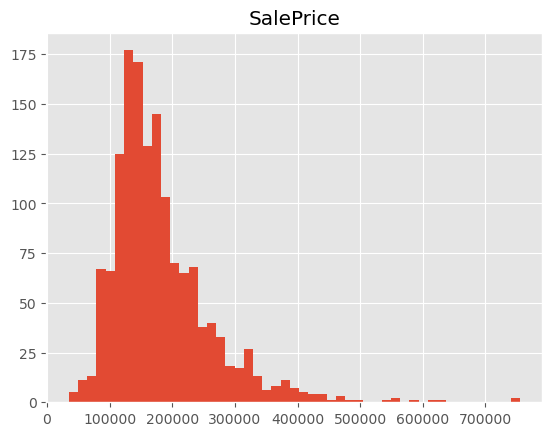

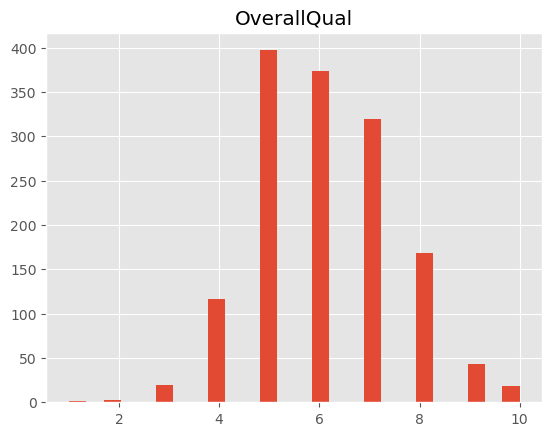

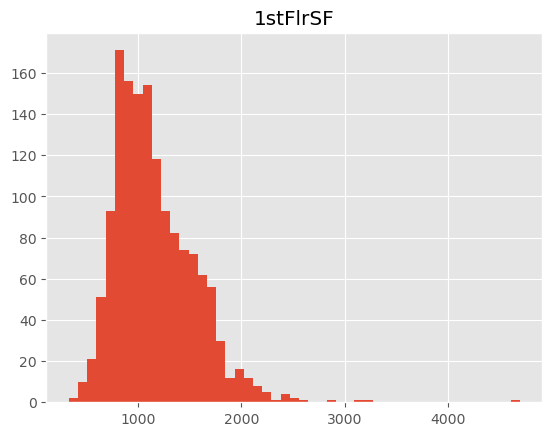

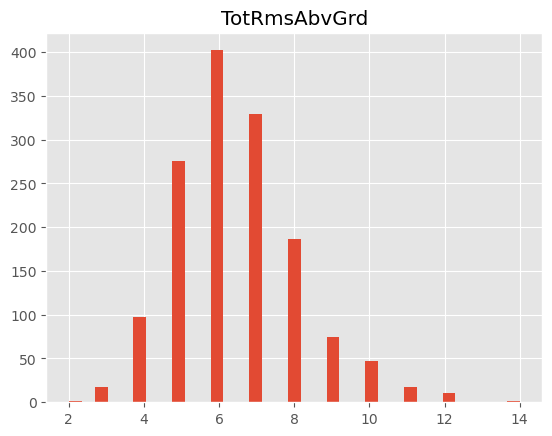

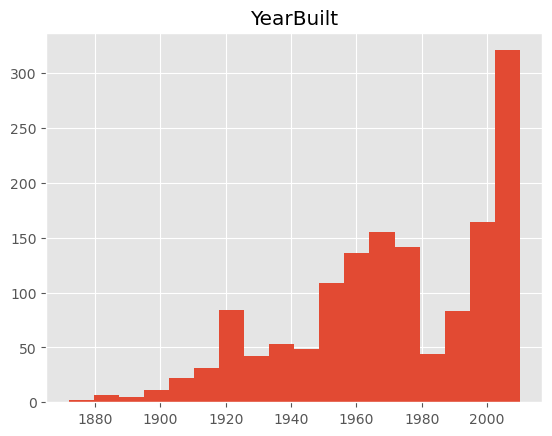

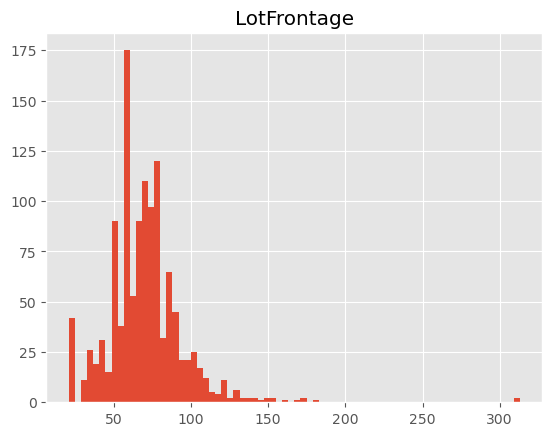

In [10]:
# dataset
datos = np.load('proyecto_training_data.npy')

#dataframe con las variables y los estadísticos descriptivos
columnas = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']
df = pd.DataFrame(datos, columns=columnas)
estadisticos = df.describe().loc[['mean', 'min', 'max'], :]

# histogramas
for columna in columnas:
    plt.hist(df[columna], bins='auto')
    plt.title(columna)
    plt.show()

### 5. Para cada variable independiente x :
### Calcular el coeficiente de correlación entre x y y.
### Graficar x vs y(scatterplot) usando matplotlib.
### Colocar el coeficiente de correlación y colocarlo como parte del título de la gráfica.
### Basado en la gráfica y el coeficiente de correlación de cada par x,y elegir las 2 variables
### con más potencial predictivo es decir las 2 variables que presentan mayor correlación entre dicha variable y la variable dependiente

In [31]:
# datos de entrenamiento
train_data = np.load('proyecto_training_data.npy')

#dataframe con los datos de entrenamiento
columnas = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']
train_df = pd.DataFrame(train_data, columns=columnas)

# coeficiente de correlación
correlacion = train_df.corr()
print('Matriz de correlación:')
print(correlacion)

Matriz de correlación:
              SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  \
SalePrice      1.000000     0.790982  0.605852      0.533723   0.522897   
OverallQual    0.790982     1.000000  0.476224      0.427452   0.572323   
1stFlrSF       0.605852     0.476224  1.000000      0.409516   0.281986   
TotRmsAbvGrd   0.533723     0.427452  0.409516      1.000000   0.095589   
YearBuilt      0.522897     0.572323  0.281986      0.095589   1.000000   
LotFrontage    0.351799     0.251646  0.457181      0.352096   0.123349   

              LotFrontage  
SalePrice        0.351799  
OverallQual      0.251646  
1stFlrSF         0.457181  
TotRmsAbvGrd     0.352096  
YearBuilt        0.123349  
LotFrontage      1.000000  


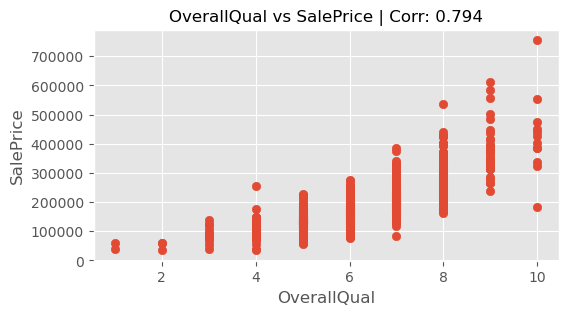

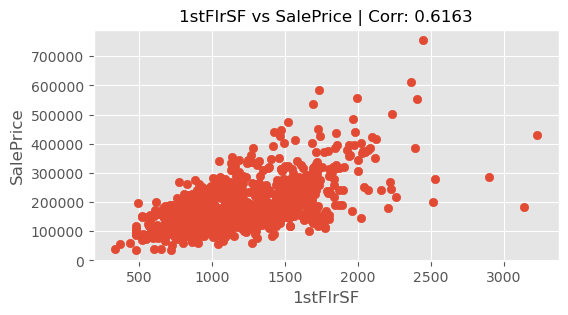

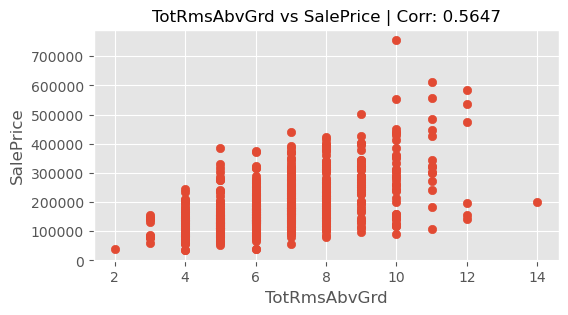

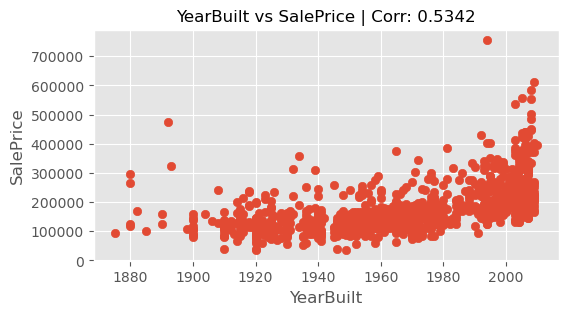

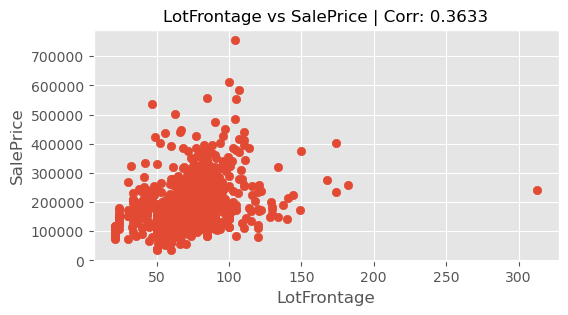

Las 2 variables con mayor potencial predictivo (nombre de columna, correlación): [('OverallQual', 0.794), ('1stFlrSF', 0.6163)]


In [13]:
def correlations_xy(data, x_dim, y_dim):
    x = data[x_dim]
    y = data[y_dim]

    # Correlación 
    corr = x.corr(y)

    # Gráfico
    plt.figure(figsize=(6, 3))
    plt.scatter(x, y)
    plt.xlabel(x_dim)
    plt.ylabel(y_dim)
    plt.title(f'{x_dim} vs {y_dim} | Corr: {round(corr, 4)}', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

    return round(corr, 4)

# Correlación y graficar para cada variable independiente x
correlations = []
for col in columnas[1:]:
    corr = correlations_xy(train_data_df, col, 'SalePrice')
    correlations.append((col, corr))

# Dos variables con mayor potencial predictivo
top_2_predictors = sorted(correlations, key=lambda x: abs(x[1]), reverse=True)[:2]
print("Las 2 variables con mayor potencial predictivo (nombre de columna, correlación):", top_2_predictors)

In [28]:
import os
print(os.getcwd())    # directorio de trabajo actual

C:\Users\cssbm


Epoch 200
....... beta1: 29988.9  beta0: 2729.6
....... error: [2.8392798e+09]
---------------------------------------
Epoch 400
....... beta1: 30280.8  beta0: 859.4
....... error: [2.82136685e+09]
---------------------------------------
Epoch 600
....... beta1: 30567.3  beta0: -975.3
....... error: [2.8041247e+09]
---------------------------------------
Epoch 800
....... beta1: 30848.4  beta0: -2775.4
....... error: [2.78752824e+09]
---------------------------------------
Epoch 1000
....... beta1: 31124.1  beta0: -4541.5
....... error: [2.77155327e+09]
---------------------------------------


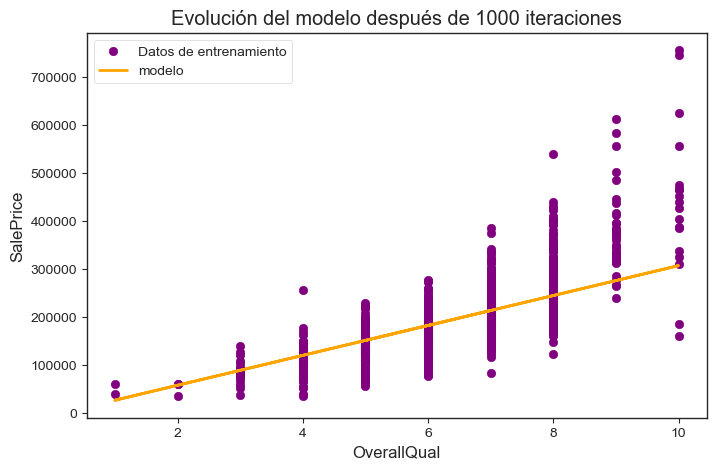

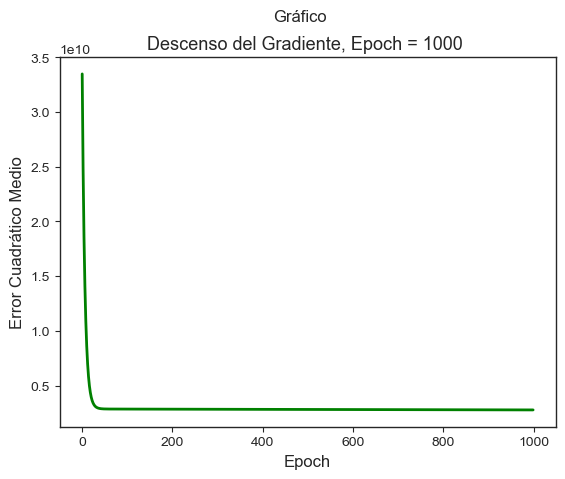

0    213327.184973
1    182203.085281
2    213327.184973
3    213327.184973
4    244451.284666
5    151078.985589
6    244451.284666
7    213327.184973
8    213327.184973
9    151078.985589
Name: OverallQual, dtype: float64


In [68]:
sns.set_style("ticks")

def regression(x, y, epochs=1000, learning_rate=0.001, iteration_epochs=200):
    
    # Descenso del gradiente
    def gradient_descent(w_, b_, alpha, x, y):
        N = x.shape[0]     
        beta_0 = -(2/N)*np.sum(y-(w_*x+b_))   
        beta_1 = -(2/N)*np.sum(x*(y-(w_*x+b_)))
        beta0 = b_ - alpha * beta_0
        beta1 = w_ - alpha * beta_1
        return beta1, beta0
      
    np.random.seed(2)
    beta1 = np.random.randn(1)[0] 
    beta0 = np.random.randn(1)[0] 

    alpha = learning_rate 
    epochs = epochs 

    error = np.zeros((epochs,1))
    history_b0 = []
    history_b1 = []
    
    for i in range(epochs):
    
        [beta1, beta0] = gradient_descent(beta1,beta0,alpha,x,y)
        history_b0.append(beta0) 
        history_b1.append(beta1) 

        y_estimated =  beta0 + beta1*x

        N = y.shape[0]
        error[i] = np.sum((y-y_estimated)**2)/N
    
        if (i+1)% iteration_epochs == 0:  
            print("Epoch {}".format(i+1)) 
            print("....... beta1: {:.1f}".format(beta1), " beta0: {:.1f}".format(beta0)) 
            print("....... error: {}".format(error[i])) 
            print("---------------------------------------")
        
        if (i+1)% (iteration_epochs * 5) == 0:
            plt.figure(figsize=(8, 5))
            plt.scatter(x, y, c='purple', label='Datos de entrenamiento')
            plt.plot(x, y_estimated, c='orange', label='modelo')
            plt.title(f'Evolución del modelo después de {i+1} iteraciones')
            plt.xlabel('OverallQual')
            plt.ylabel('SalePrice')
            plt.legend()
            plt.show()
    
    plt.plot(range(epochs), error, color ="green")
    plt.xlabel('Epoch')
    plt.title("Descenso del Gradiente, Epoch = {epochs} ".format(epochs = str(epochs)), fontsize = 13)
    plt.suptitle("Gráfico")
    plt.ylabel('Error Cuadrático Medio')
    plt.show()
    
    return beta0, beta1, epochs, error, history_b0, history_b1

# Datos
overall_qual = train_df['OverallQual']
first_flr_sf = train_df['1stFlrSF']
sale_price = train_df['SalePrice']

# Entrenamiento
beta0, beta1, epochs, error, history_b0, history_b1 = regression(x=overall_qual, y=sale_price)

# Hacer una predicción de los valores de y
y_pred = beta0 + beta1 * overall_qual

# Imprimir los primeros 10 valores de y_pred
print(y_pred[:10])

In [87]:
import seaborn as sns

def desarrollo_modelo(beta0, beta1, x_entrenamiento, y_entrenamiento, repeticiones):
    sns.set_style("ticks")
    for i in range(0, len(beta0), repeticiones):
        y_estimada = beta0[i] + beta1[i] * x_entrenamiento
        fig, ax = plt.subplots()
        ax.plot(x_entrenamiento, y_entrenamiento, 'o', color='purple', label='Datos de entrenamiento')
        ax.plot(x_entrenamiento, y_estimada, '-', color='orange', label='Modelo')
        ax.set_title(f'Evolución del modelo después de {i+1} iteraciones')
        ax.set_xlabel('')
        ax.legend()
        plt.show()


Epoch 200
....... beta1: 29988.9  beta0: 2729.6
....... error: [2.8392798e+09]
---------------------------------------
Epoch 400
....... beta1: 30280.8  beta0: 859.4
....... error: [2.82136685e+09]
---------------------------------------
Epoch 600
....... beta1: 30567.3  beta0: -975.3
....... error: [2.8041247e+09]
---------------------------------------
Epoch 800
....... beta1: 30848.4  beta0: -2775.4
....... error: [2.78752824e+09]
---------------------------------------
Epoch 1000
....... beta1: 31124.1  beta0: -4541.5
....... error: [2.77155327e+09]
---------------------------------------


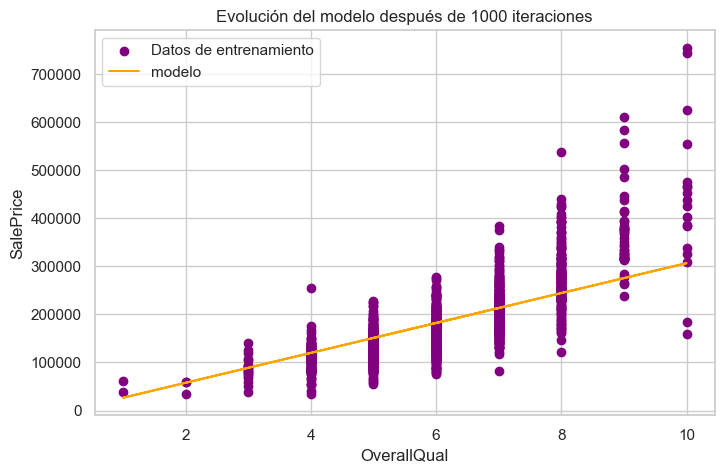

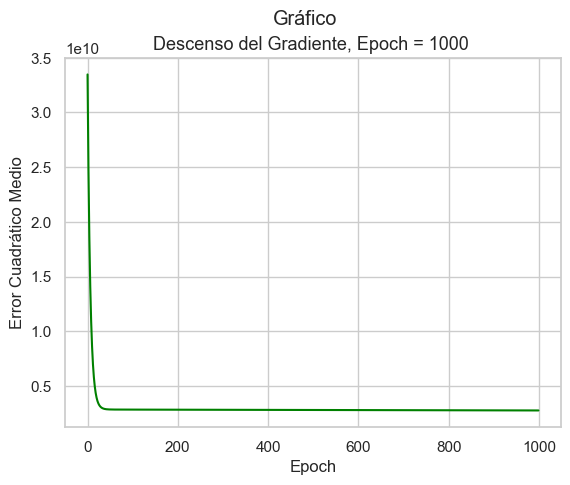

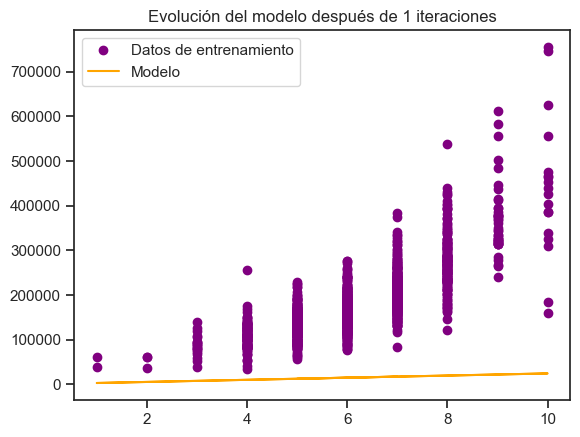

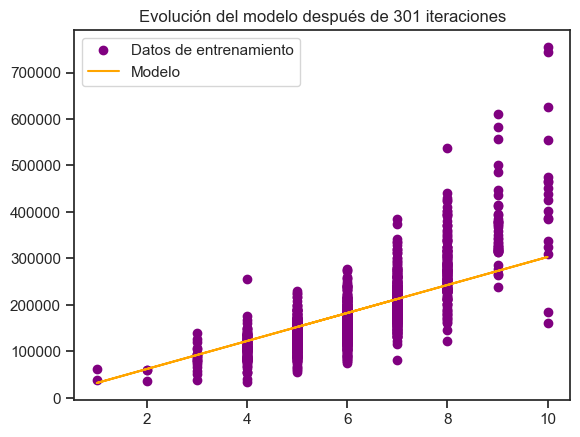

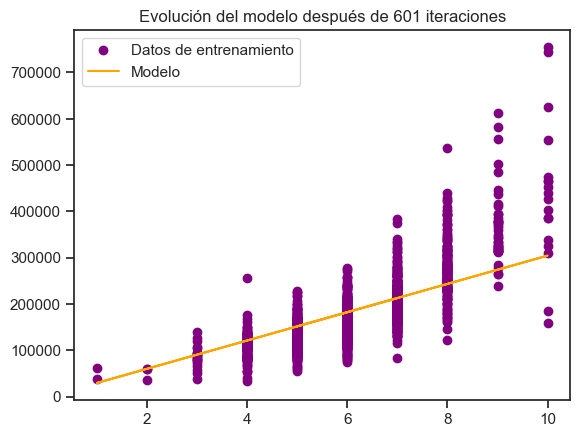

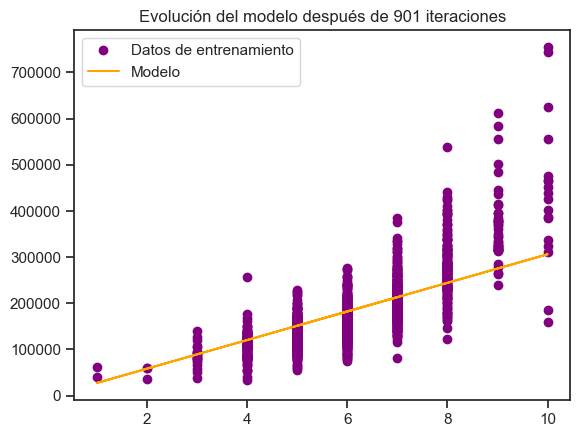

In [88]:
# Entrenamiento
beta0, beta1, epochs, error, history_b0, history_b1 = regression(x=overall_qual, y=sale_price)

# Verificar desarrollo del modelo
desarrollo_modelo(history_b0, history_b1, overall_qual, sale_price, 300)


### Datos de entrenamiento 

In [100]:
def desarrollo_modelo(beta0, beta1, x_entrenamiento, y_entrenamiento, y_est_entrenamiento, repeticiones):
    sns.set_style("ticks")
    for i in range(0, len(beta0), repeticiones):
        y_estimada = beta0[i] + beta1[i] * x_entrenamiento
        fig, ax = plt.subplots()
        ax.plot(x_entrenamiento, y_entrenamiento, 'go', label='Datos de entrenamiento')
        ax.plot(x_entrenamiento, y_estimada, 'k', label='Modelo')
        ax.plot(x_entrenamiento, y_est_entrenamiento, 'r', label='Datos de entrenamiento estimados')
        ax.set_title(f'Evolución del modelo después de {i+1} iteraciones')
        ax.set_xlabel('')
        ax.legend()
        plt.show()


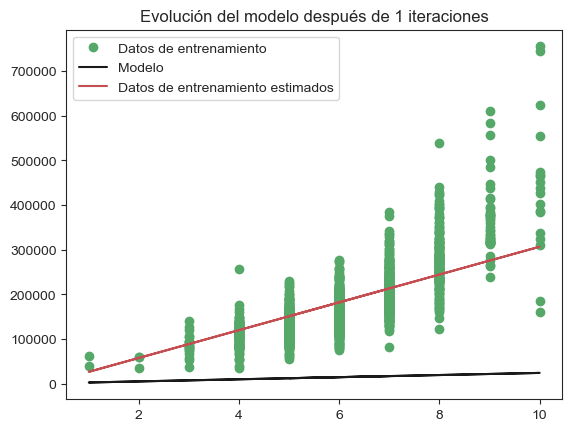

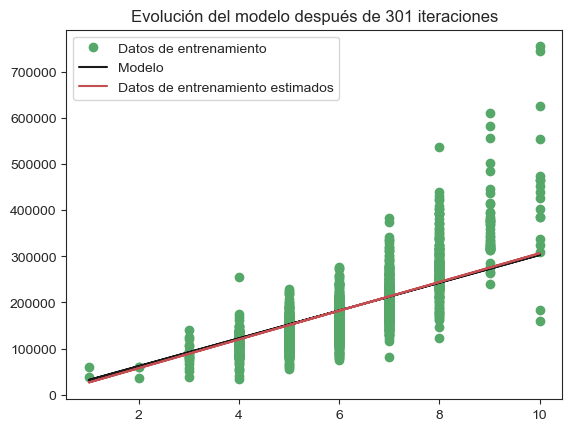

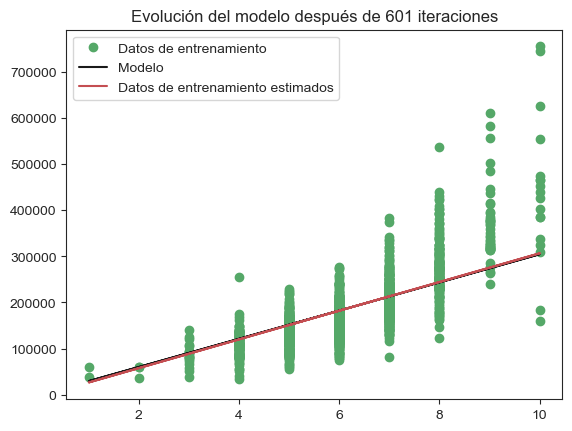

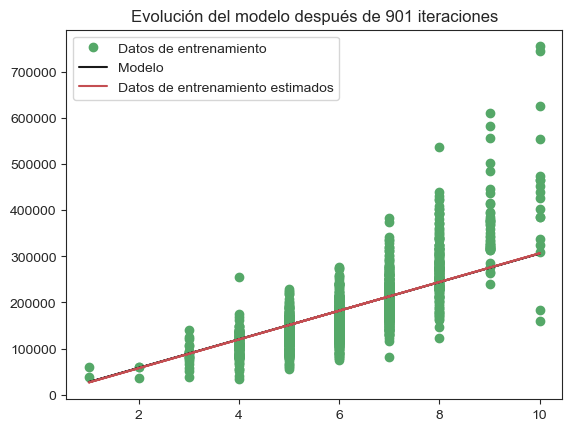

In [98]:
# valores estimados por el modelo para los datos de entrenamiento
y_est_entrenamiento = history_b0[-1] + history_b1[-1] * overall_qual

# Verificar desarrollo del modelo
desarrollo_modelo(history_b0, history_b1, overall_qual, sale_price, y_est_entrenamiento, 300)


In [162]:
def estimacion(x_prueba, beta0, beta1):
    lista = x_prueba
    y_predictivo = []
    x_valores = []
    for i in range(0, len(x_prueba)):
        y_predictivo.append(beta0 + beta1 * list(lista)[i])
        x_valores.append(list(lista)[i])

    df = pd.DataFrame()
    df["y_estimado"] = pd.Series(y_predictivo)
    df["valores_de_x"] = pd.Series(x_valores)
    return df

df_prueba = pd.DataFrame({'x_prueba': x_prueba})
df_estimacion = estimacion(x_prueba, beta0, beta1)
df_prediccion = pd.concat([df_prueba, df_estimacion['y_estimado']], axis=1)
print(df_prediccion.head())


      x_prueba  y_estimado
1360       5.0         NaN
1361       7.0         NaN
1362       4.0         NaN
1363       6.0         NaN
1364       7.0         NaN


Epoch 200
....... beta1: 29876.4  beta0: 2868.6
....... error: [2.69559067e+09]
---------------------------------------
Epoch 400
....... beta1: 30143.0  beta0: 1157.3
....... error: [2.68059386e+09]
---------------------------------------
Epoch 600
....... beta1: 30404.7  beta0: -522.4
....... error: [2.66614327e+09]
---------------------------------------
Epoch 800
....... beta1: 30661.5  beta0: -2171.4
....... error: [2.65221901e+09]
---------------------------------------
Epoch 1000
....... beta1: 30913.7  beta0: -3790.0
....... error: [2.63880191e+09]
---------------------------------------


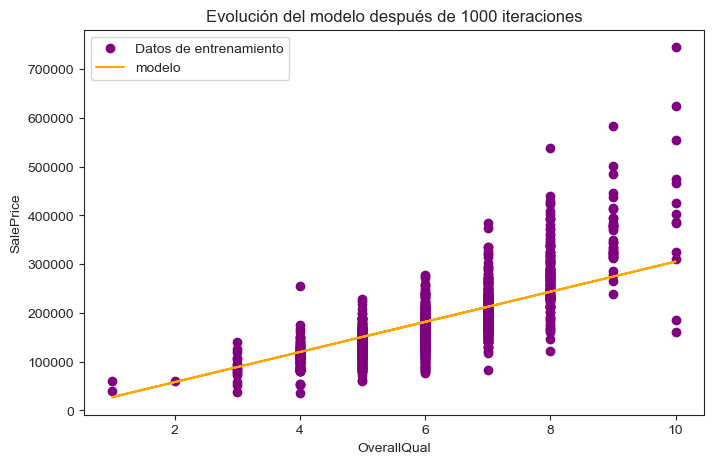

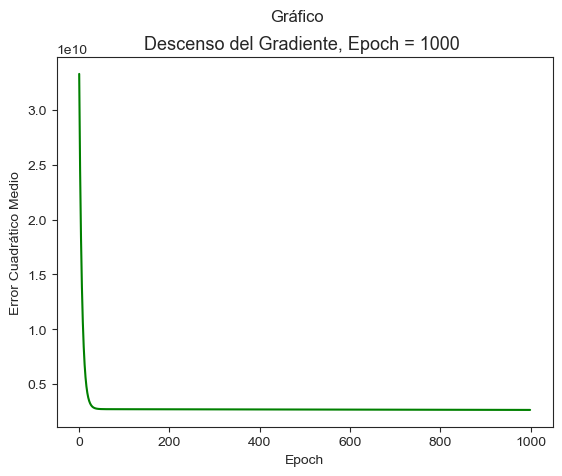

      X_prueba  y_prueba  X_prueba     y_estimado
892        6.0  154500.0       6.0  181692.113872
1105       8.0  325000.0       8.0  243519.473809
413        5.0  115000.0       5.0  150778.433903
522        6.0  159000.0       6.0  181692.113872
1036       9.0  315500.0       9.0  274433.153778


In [164]:
# Dividir los datos en un conjunto de entrenamiento y un conjunto de prueba
from sklearn.model_selection import train_test_split

X = train_df['OverallQual']
y = train_df['SalePrice']

X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
beta0, beta1, epochs, error, history_b0, history_b1 = regression(x=X_entrenamiento, y=y_entrenamiento)

# predicción de los valores de y para el conjunto de prueba
y_est_prueba = beta0 + beta1 * X_prueba

# Obtener DataFrame con y estimado para los valores de x de prueba
df_estimacion = pd.DataFrame({'X_prueba': X_prueba, 'y_estimado': y_est_prueba})

# Concatenar los DataFrames para mostrar los valores de x y los valores estimados de y en una misma tabla
df_prediccion = pd.concat([pd.DataFrame({'X_prueba': X_prueba, 'y_prueba': y_prueba}), df_estimacion], axis=1)
print(df_prediccion.head())


In [177]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

def train_and_predict(x_train, y_train, x_test, beta0, beta1):
    # Entrenar modelo con scikit-learn
    model = LinearRegression()
    model.fit(x_train.to_numpy().reshape(-1, 1), y_train)

    # Hacer predicción con modelo entrenado manualmente
    y_pred_manual = beta0 + beta1 * x_test
    mse_manual = mean_squared_error(y_test, y_pred_manual)

    # Hacer predicción con modelo de scikit-learn
    y_pred_sklearn = model.predict(x_test.reshape(-1, 1))
    mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)

    # Calcular promedio de las predicciones
    y_pred_avg = (y_pred_manual + y_pred_sklearn) / 2
    mse_avg = mean_squared_error(y_test, y_pred_avg)

    return y_pred_manual, y_pred_sklearn, y_pred_avg, mse_manual, mse_sklearn, mse_avg


Epoch 200
....... beta1: 29876.4  beta0: 2868.6
....... error: [2.69559067e+09]
---------------------------------------
Epoch 400
....... beta1: 30143.0  beta0: 1157.3
....... error: [2.68059386e+09]
---------------------------------------
Epoch 600
....... beta1: 30404.7  beta0: -522.4
....... error: [2.66614327e+09]
---------------------------------------
Epoch 800
....... beta1: 30661.5  beta0: -2171.4
....... error: [2.65221901e+09]
---------------------------------------
Epoch 1000
....... beta1: 30913.7  beta0: -3790.0
....... error: [2.63880191e+09]
---------------------------------------


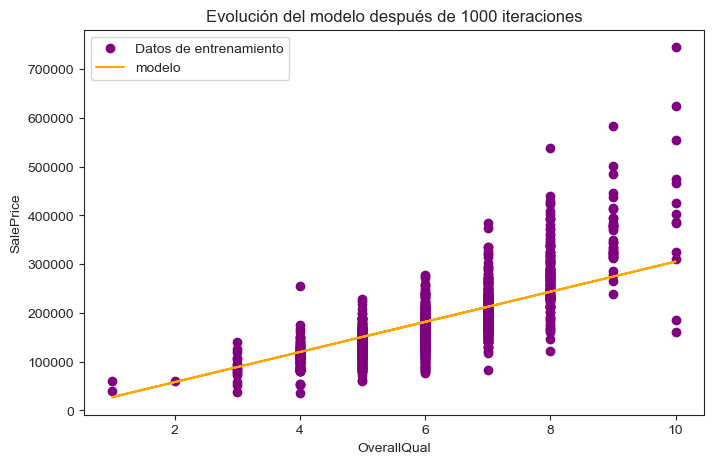

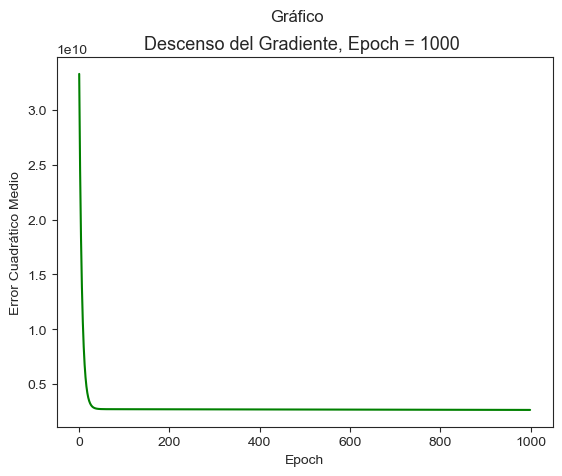

ValueError: y_true and y_pred have different number of output (1!=292)

In [182]:
# Calcular errores de los modelos
x = train_df['OverallQual']
y = train_df['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
beta0, beta1, _, _, _, _ = regression(x=x_train, y=y_train)
x_test = x_test.to_numpy().reshape(-1, 1)
y_pred_manual, y_pred_sklearn, y_pred_avg, mse_manual, mse_sklearn, mse_avg = train_and_predict(x_train=x_train, y_train=y_train, x_test=x_test, beta0=beta0, beta1=beta1)

# Aplanar y_pred_avg
y_pred_avg = y_pred_avg.ravel()

# Crear histograma
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
axs[0].hist(y_test - y_pred_manual, bins=30)
axs[0].set_title('Manual')
axs[1].hist(y_test - y_pred_sklearn, bins=30)
axs[1].set_title('Scikit-Learn')
axs[2].hist(y_test - y_pred_avg, bins=30)
axs[2].set_title('Promedio')
fig.suptitle('Errores de predicción para la variable x = {}'.format(x.name))

# Calcular MSE a partir de y_test y y_pred_avg aplanado
mse_avg = mean_squared_error(y_test, y_pred_avg)

plt.show()


In [183]:
# Calcular la correlación entre OverallQual y SalePrice
correlation = train_df['OverallQual'].corr(train_df['SalePrice'])

print('El coeficiente de correlación entre OverallQual y SalePrice es:', round(correlation, 4))

El coeficiente de correlación entre OverallQual y SalePrice es: 0.791


In [184]:
from sklearn.metrics import mean_squared_error

# datos de prueba y las predicciones
y_test = [1, 2, 3, 4, 5]
y_pred = [1.2, 1.8, 3.2, 4.1, 4.8]

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)


MSE: 0.034


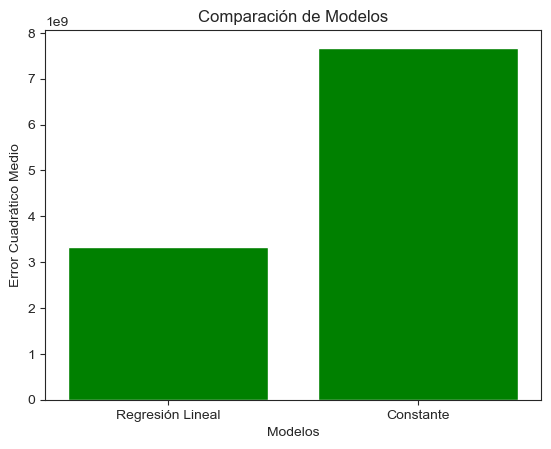

El mejor modelo es el Regresión Lineal con un error cuadrático medio de 3338697919.85


In [185]:
# Calcular el error cuadrático medio para el modelo de regresión lineal
mse_lr = mean_squared_error(y_prueba, y_est_prueba)

# Calcular el error cuadrático medio para el modelo constante (usando la media de y_entrenamiento como predicción)
y_est_constante = np.full_like(y_prueba, fill_value=np.mean(y_entrenamiento))
mse_constante = mean_squared_error(y_prueba, y_est_constante)

# Graficar los errores
labels = ['Regresión Lineal', 'Constante']
mse_values = [mse_lr, mse_constante]
plt.bar(labels, mse_values, color='green')
plt.xlabel('Modelos')
plt.ylabel('Error Cuadrático Medio')
plt.title('Comparación de Modelos')
plt.show()

# Identificar el mejor modelo
mejor_modelo = np.argmin([mse_lr, mse_constante])
print(f'El mejor modelo es el {labels[mejor_modelo]} con un error cuadrático medio de {mse_values[mejor_modelo]:.2f}')
